# Import Required Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

# Upload Dataset

In [2]:
df = pd.read_csv('titanic/train.csv')http://localhost:8888/notebooks/DATA%20SCIENCE/Titanic%20Passenger%20Survived%20Prediction-Copy1.ipynb#
df_test = pd.read_csv('titanic/test.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
passengerId = df_test.PassengerId
passengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_test.shape

(418, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Exploratory Data Analysis

###  Q1. Berapa banyak penumpang yang selamat ?

Text(0.5, 1.0, 'Jumlah penumpang selamat/deceased')

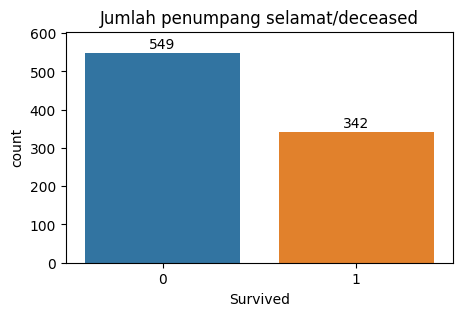

In [9]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=df.Survived)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)

plt.title('Jumlah penumpang selamat/deceased')

 Kesimpulan : Penumpang yang selamat lebih sedikit daripada penumpang yang tidak selamat. 

### Q2. Berapa banyak perempuan dan laki-laki yang selamat ?

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Jumlah Penumpang Selamat berdasarkan jenis kelamin')

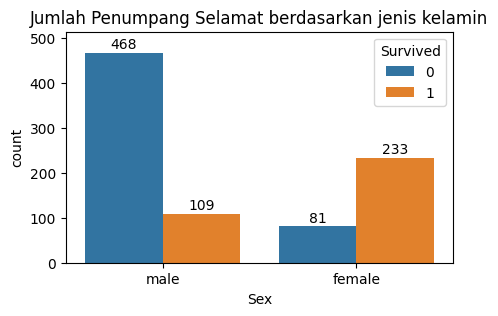

In [10]:
display(df.Sex.value_counts())
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=df.Sex, hue=df.Survived)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)
plt.title('Jumlah Penumpang Selamat berdasarkan jenis kelamin')

Kesimpulan : Perempuan lebih banyak yang selamat daripada laki-laki.

### Q3. Berapa banyak yang selamat berdasarkan kelas tiket?

Text(0.5, 1.0, 'Perbandingan penumpang selamat berdasarkan Pclass')

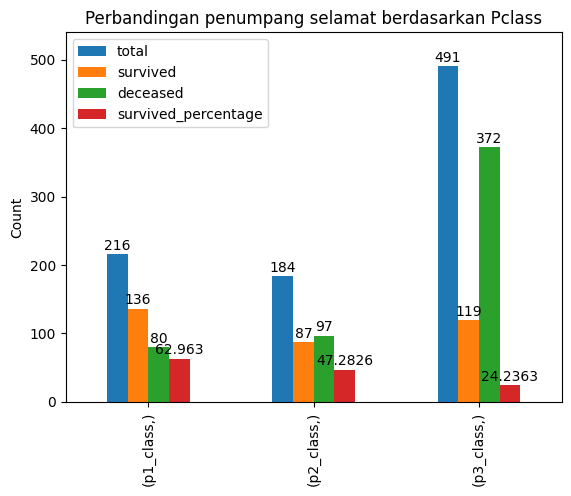

In [11]:
# sekarang kita hitung persentase penumpang yang selamat berdasarkan tiket yang dimiliki.

p1_total = len(df[df.Pclass==1])
p2_total = len(df[df.Pclass==2])
p3_total = len(df[df.Pclass==3])

p1_survived = len(df[(df['Pclass'] == 1) & (df['Survived'] == 1)])
p2_survived = len(df[(df['Pclass'] == 2) & (df['Survived'] == 1)])
p3_survived = len(df[(df['Pclass'] == 3) & (df['Survived'] == 1)])

p1_percentage = p1_survived/p1_total*100
p2_percentage = p2_survived/p2_total*100
p3_percentage = p3_survived/p3_total*100

survived = pd.DataFrame({
    'total': [p1_total, p2_total, p3_total],
    'survived': [p1_survived, p2_survived, p3_survived],
    'deceased': [p1_total-p1_survived, p2_total-p2_survived, p3_total-p3_survived],
    'survived_percentage': [p1_percentage, p2_percentage,p3_percentage]
}, index=[['p1_class', 'p2_class', 'p3_class']])

ax = survived.plot(kind='bar')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)

plt.title('Perbandingan penumpang selamat berdasarkan Pclass')

### Q4. Siapakah yang berpotensi lebih tinggi untuk selamat berdasarkan umur, jenis kelamin dan tiket yang dimilikinya?

Penggolongan Usia Menurut WHO :

1. Balita        : 0 - 5 tahun.
2. Kanak - Kanak : 5 - 11 tahun.
3. Remaja        : 12 - 25 tahun.
4. Dewasa        : 26 - 45 tahun.
5. Lansia        : 46 - 65 tahun.
6. Manula        : > 65 tahun.

In [12]:
def age_range_df(age_range, df):
    if age_range == "balita":
        filtered_df = df[df.Age <= 5]
    elif age_range == "kanak-kanak":
        filtered_df = df[(df.Age > 5) & (df.Age <= 11)]
    elif age_range == "remaja":
        filtered_df = df[(df.Age > 11) & (df.Age <= 25)]
    elif age_range == "dewasa":
        filtered_df = df[(df.Age > 25) & (df.Age <= 45)]
    elif age_range == "lansia":
        filtered_df = df[(df.Age > 45) & (df.Age <= 65)]
    elif age_range == "manula":
        filtered_df = df[df.Age > 65]
    else:
        raise ValueError("Invalid age range. Should be one of: 'balita', 'kanak-kanak', 'remaja', 'dewasa', 'lansia', 'manula'")

    print(f"Jumlah seluruh {age_range} adalah: {filtered_df.Age.count()}")
    print(f"Sebaran umur {age_range} adalah:")
    display(filtered_df.Age.value_counts())

    plt.figure(figsize=(12,3))
    ax = sns.countplot(x='Age', hue='Survived', data=filtered_df)
    for i in ax.containers:
        ax.bar_label(i, label_type='edge', padding=1)
    ax.margins(y=0.1)
    
    sns.set_style("darkgrid")
    sns.relplot(x='Age', y='Fare', hue='Survived', col='Pclass', data=filtered_df)

    return filtered_df

Jumlah seluruh balita adalah: 44
Sebaran umur balita adalah:


2.00    10
4.00    10
1.00     7
3.00     6
5.00     4
0.83     2
0.75     2
0.92     1
0.67     1
0.42     1
Name: Age, dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
171,172,0,3,"Rice, Master. Arthur",male,4.00,4,1,382652,29.1250,NaN,Q


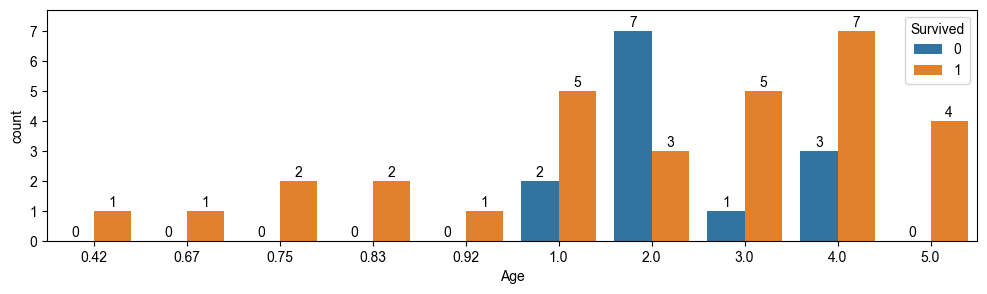

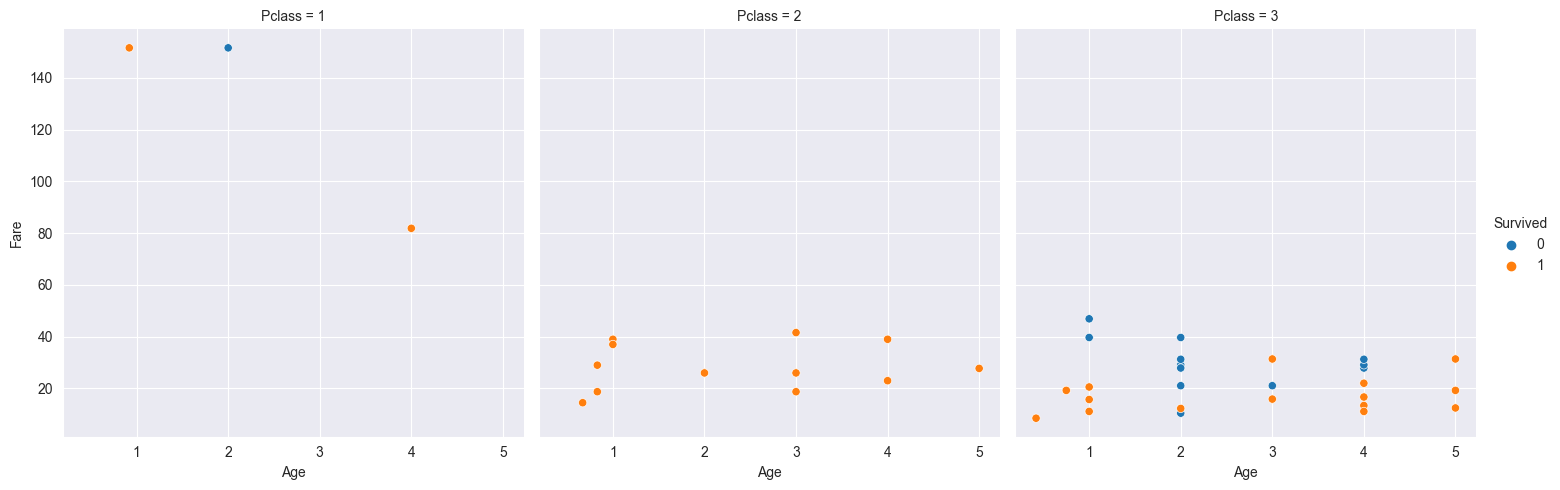

In [13]:
age_range_df("balita", df)

Jumlah seluruh kanak-kanak adalah: 24
Sebaran umur kanak-kanak adalah:


9.0     8
8.0     4
11.0    4
7.0     3
6.0     3
10.0    2
Name: Age, dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.2500,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,NaN,S


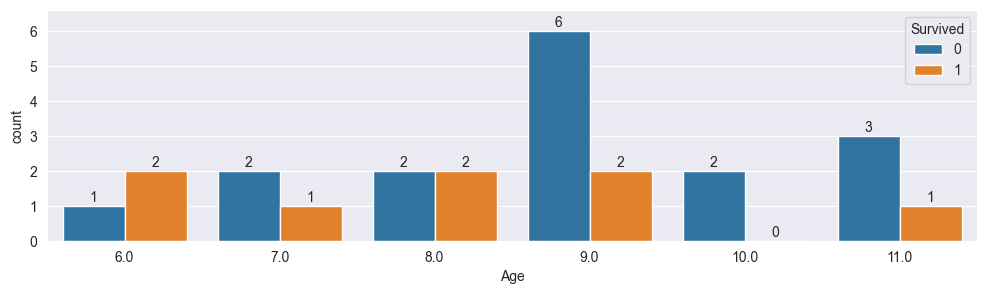

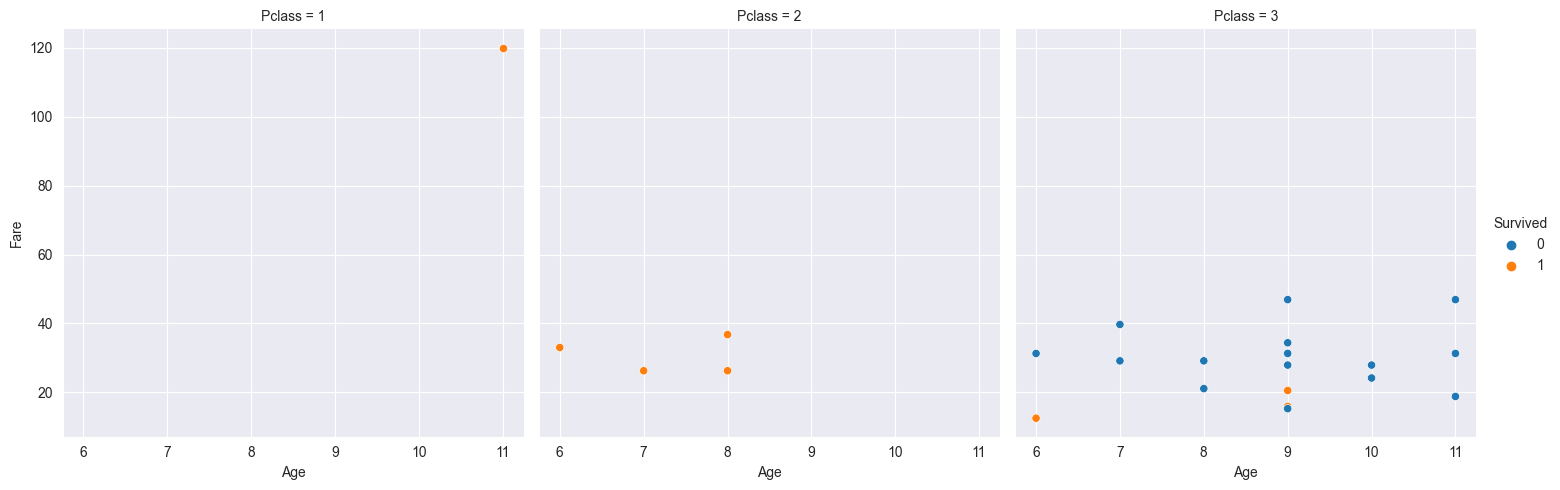

In [14]:
age_range_df("kanak-kanak", df)

Jumlah seluruh remaja adalah: 233
Sebaran umur remaja adalah:


24.0    30
22.0    27
18.0    26
19.0    25
21.0    24
25.0    23
16.0    17
23.0    15
20.0    15
17.0    13
14.0     6
15.0     5
13.0     2
14.5     1
12.0     1
20.5     1
23.5     1
24.5     1
Name: Age, dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


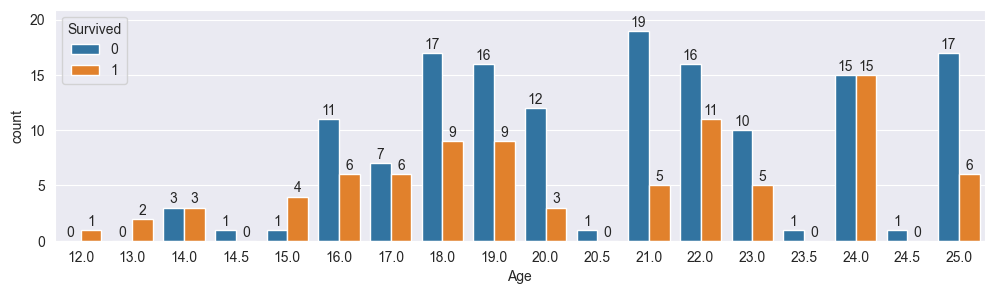

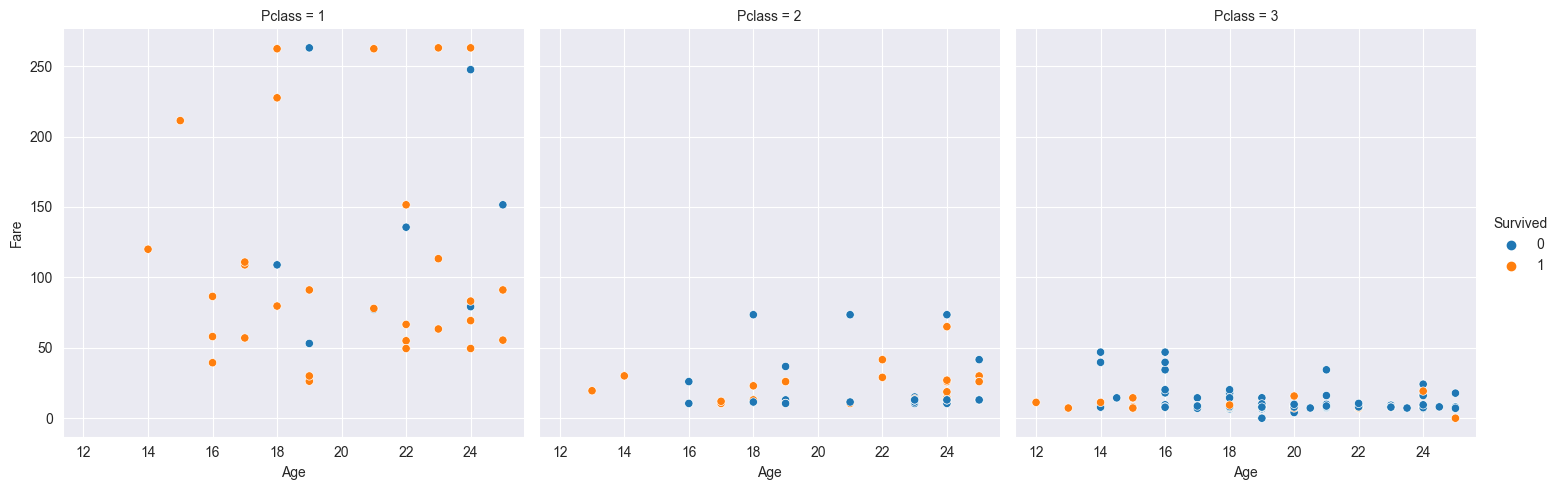

In [15]:
age_range_df("remaja", df)

Jumlah seluruh dewasa adalah: 310
Sebaran umur dewasa adalah:


28.0    25
30.0    25
36.0    22
29.0    20
32.0    18
35.0    18
27.0    18
26.0    18
31.0    17
33.0    15
34.0    15
39.0    14
40.0    13
42.0    13
45.0    12
38.0    11
44.0     9
37.0     6
41.0     6
43.0     5
32.5     2
40.5     2
28.5     2
30.5     2
36.5     1
34.5     1
Name: Age, dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


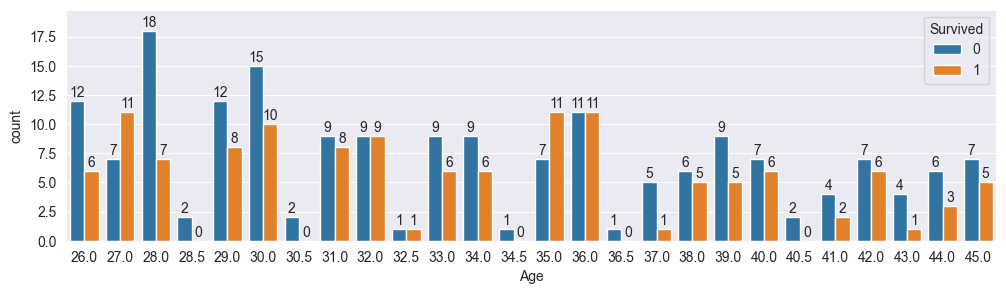

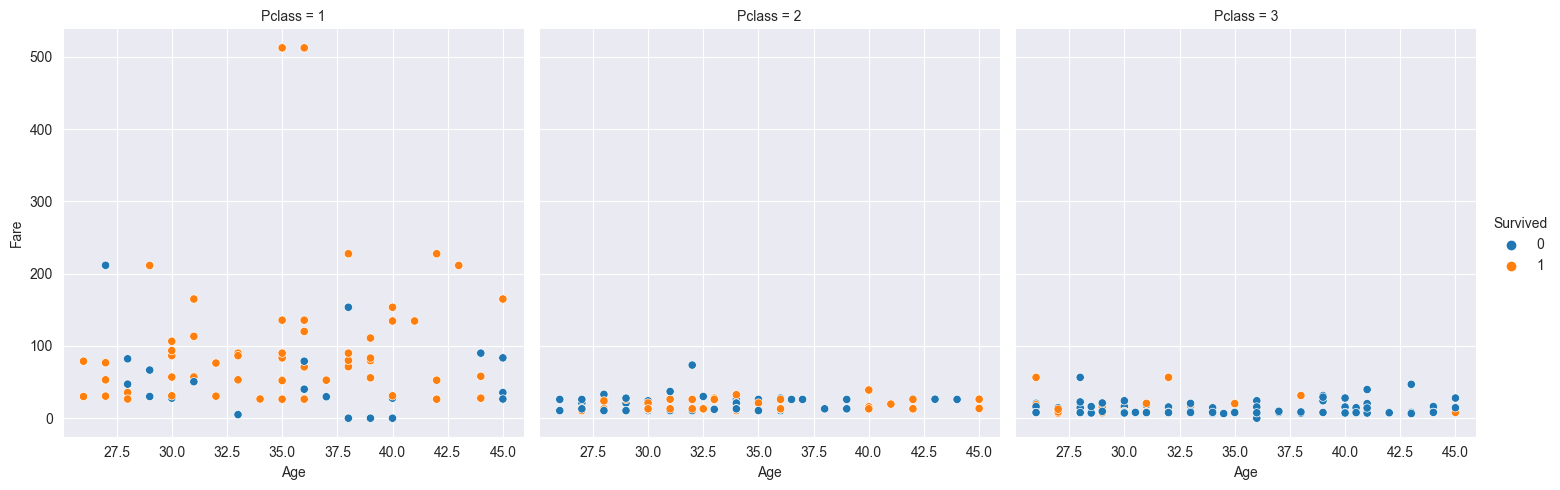

In [16]:
age_range_df("dewasa", df)

Jumlah seluruh lansia adalah: 95
Sebaran umur lansia adalah:


50.0    10
48.0     9
47.0     9
54.0     8
51.0     7
49.0     6
52.0     6
58.0     5
60.0     4
62.0     4
56.0     4
61.0     3
46.0     3
65.0     3
45.5     2
59.0     2
63.0     2
64.0     2
55.0     2
57.0     2
55.5     1
53.0     1
Name: Age, dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
...,...,...,...,...,...,...,...,...,...,...,...,...
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S


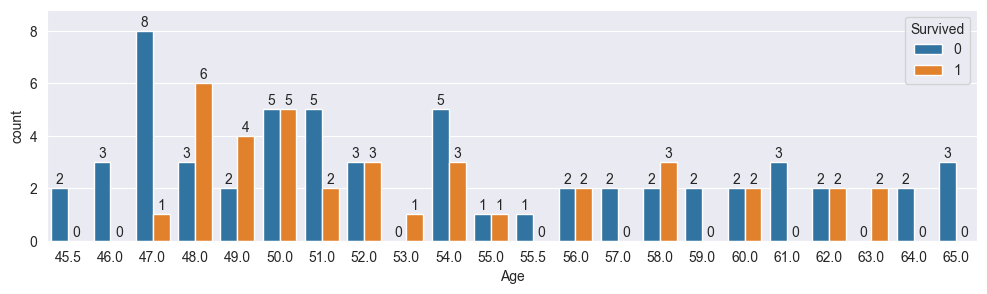

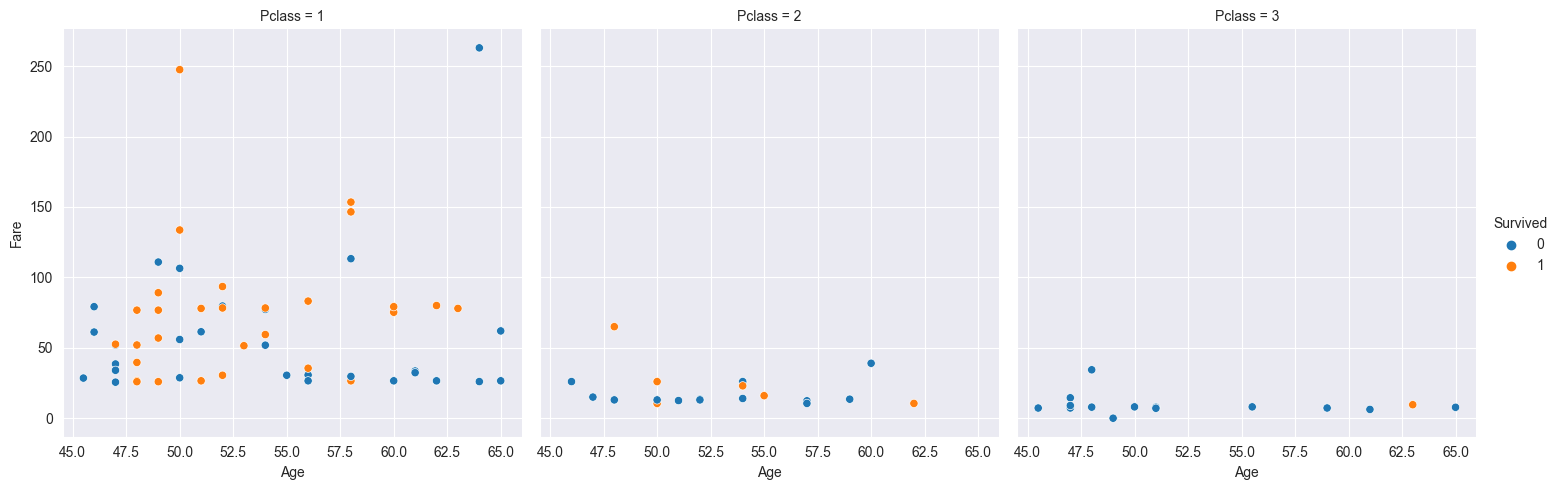

In [17]:
age_range_df("lansia", df)

Jumlah seluruh manula adalah: 8
Sebaran umur manula adalah:


71.0    2
70.0    2
66.0    1
70.5    1
80.0    1
74.0    1
Name: Age, dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


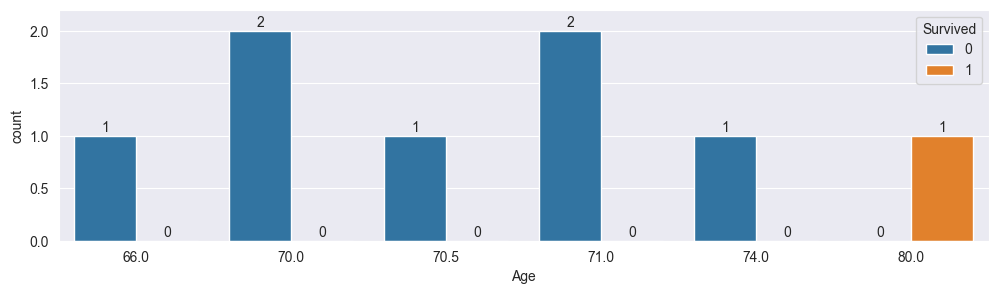

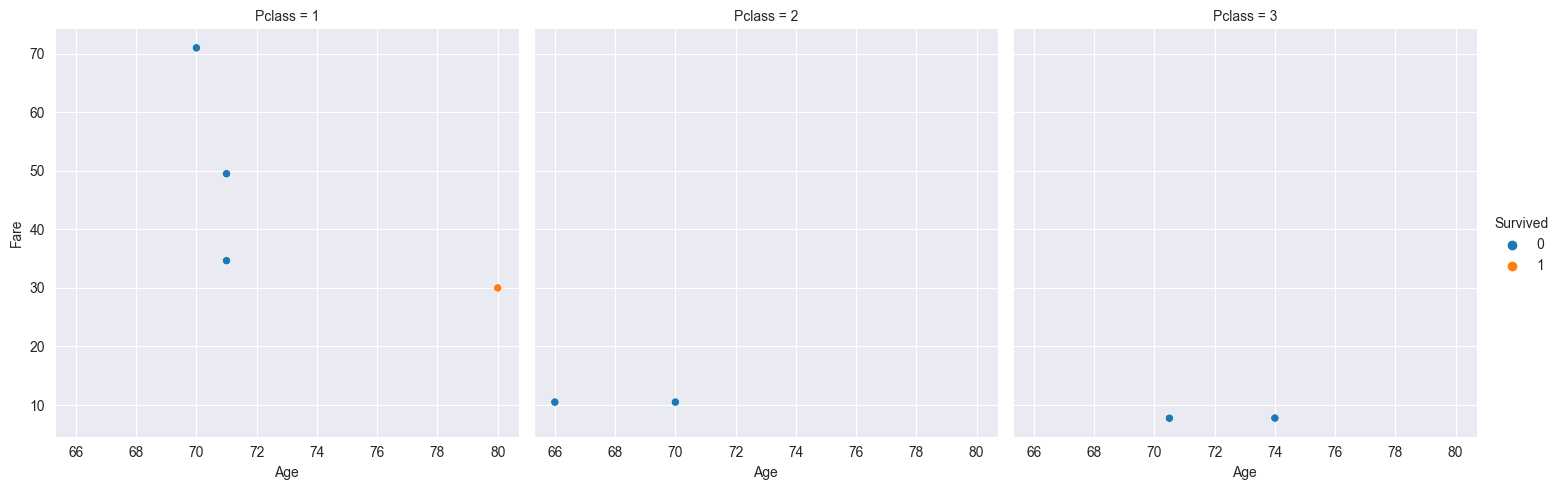

In [18]:
age_range_df("manula", df)

<AxesSubplot: >

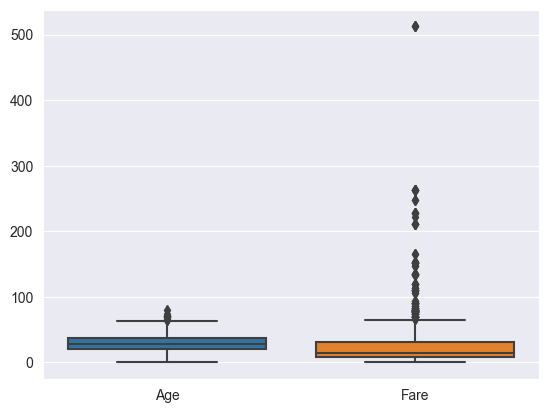

In [19]:
sns.boxplot(df[['Age', 'Fare',]])

In [20]:
df[df.Fare>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


# PREPROCESSING

### Feature Engineering df

In [21]:
df['Family_size'] = df['SibSp'] + df['Parch']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


### missing values pada df

In [22]:
# buang kolom yang tidak diperlukan
 
df = df.drop(['Ticket', 'Cabin', 'Name', 'PassengerId', 'SibSp', 'Parch'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [23]:
df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         2
Family_size      0
dtype: int64

In [24]:
# Mengisi kolom NaN poda Age dengan nilai -rata-rata/mean
# Mengisi kolom NaN pada Embarked dengan kategori yang sering muncul

df.Age  = df.Age.fillna(df.Age.mean())
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [25]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
# mengubah nilai kategorical menjadi nilai numerik dengan labelling menggunakan method get_dummies()

df.Sex = df.Sex.map({'male':0, 'female':1})
df.Embarked = df.Embarked.map({'S':0, 'C':1, 'Q':2})
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,0,22.0,7.2500,0,1
1,1,1,1,38.0,71.2833,1,1


In [27]:
df.shape[1]

7

### Feature Engineering df_test

In [28]:
df_test['Family_size'] = df_test['SibSp'] + df_test['Parch']
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1


### missing values pada df_test

In [29]:
# hapus kolom yang tidak diperlukan

df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1)
df_test.isnull().sum()

Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
Family_size     0
dtype: int64

In [30]:
# mengisi nilai NaN pada kolom Age dengan nilai rata-rata/mean
# mengisi nilai NaN pada kolom Fare dengan nilai rata-rata/mean

df_test.Age = df_test.Age.fillna(df_test.Age.mean())
df_test.Fare = df_test.Fare.fillna(df_test.Fare.mean())
df_test.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [31]:
# mengubah nilai kategorical menjadi nilai numerik dengan labelling menggunakan method ge_dummies()

df_test.Sex = df_test.Sex.map({'male':0, 'female':1})
df_test.Embarked = df_test.Embarked.map({'S':0, 'C':1, 'Q':2})
df_test.head(2)

,Pclass,Sex,Age,Fare,Embarked,Family_size
0,3,0,34.5,7.8292,2,0
1,3,1,47.0,7.0000,0,1


In [32]:
df_test.shape[1]

6

# Train Test Split Dataset

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.drop(columns='Survived')
y = df['Survived']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42 )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((801, 6), (90, 6), (801,), (90,))

# Import Models

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

In [44]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

sgd = SGDClassifier()
sgd.fit(X_train,y_train)
sgd_pred = sgd.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)

lr_r2_score = metrics.r2_score(y_test, lr_pred)
sgd_r2_score = metrics.r2_score(y_test, sgd_pred)
knn_r2_score = metrics.r2_score(y_test, knn_pred)
rf_r2_score = metrics.r2_score(y_test, rf_pred)
nb_r2_score = metrics.r2_score(y_test, nb_pred)
dtc_r2_score = metrics.r2_score(y_test, dtc_pred)


lr_mae_score = metrics.mean_absolute_error(y_test, lr_pred)
sgd_mae_score = metrics.mean_absolute_error(y_test, sgd_pred)
knn_mae_score = metrics.mean_absolute_error(y_test, knn_pred)
rf_mae_score = metrics.mean_absolute_error(y_test, rf_pred)
nb_mae_score = metrics.mean_absolute_error(y_test, nb_pred)
dtc_mae_score = metrics.mean_absolute_error(y_test, dtc_pred)

lr_acc_score = accuracy_score(y_test, lr_pred)
sgd_acc_score = accuracy_score(y_test, sgd_pred)
knn_acc_score = accuracy_score(y_test, knn_pred)
rf_acc_score = accuracy_score(y_test, rf_pred)
nb_acc_score = accuracy_score(y_test, nb_pred)
dtc_acc_score = accuracy_score(y_test, dtc_pred)

all_metrics = pd.DataFrame([[lr_r2_score, sgd_r2_score, knn_r2_score, rf_r2_score, nb_r2_score, dtc_r2_score], 
                            [lr_mae_score, sgd_mae_score, knn_mae_score, rf_mae_score, nb_mae_score, dtc_mae_score], 
                           [lr_acc_score*100, sgd_acc_score*100, knn_acc_score*100, rf_acc_score*100, nb_acc_score*100, dtc_acc_score*100]], 
                           columns=['lr', 'sgd', 'knn', 'rf', 'nb', 'dtc'], index=['r2', 'mae', 'acc'])
all_metrics

,lr,sgd,knn,rf,nb,dtc
r2,0.444444,-0.157407,-0.111111,0.351852,0.212963,0.120370
mae,0.133333,0.277778,0.266667,0.155556,0.188889,0.211111
acc,86.666667,72.222222,73.333333,84.444444,81.111111,78.888889


# Predict Using Model Trained By Using Entire Dataset

In [46]:
Y_pred = lr.predict(df_test)
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
submission = pd.DataFrame({
    'PassengerId' : passengerId,
    'Survived': Y_pred
})

submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [48]:
submission.to_csv('C:/Users/User/DATA SCIENCE/titanic/titanic_predict_submission.2.csv', index=False)